<h1 style='text-align:center; text-decoration:underline; color: cyan;  font-size:35px; font-weight:bold'>
    THESIS PROJECT SCRIPTS
<h1/>

<h1 style="text-align: justify; font-size:22px; font-weight:bold">
Probability Distributions analysis
<h1/> 
<p style="text-align: justify; font-size:18px">
    The first we shall do is implement the probability distributions, first we´re going to write the code for each one of them and making some graphs, we'll use the following distributions (all of them double truncated):    
    </p> 
    <ul style="text-align: justify; color: white; font-size:20px">
        <li> Uniform </li>
        <li> Weibull  </li>
        <li> Gamma </li>
        <li> Gaussian </li>
    </ul>
<p style="text-align: justify; font-size:18px">
  We will use these distributions to generate values from the following table 
    </p> 
<img src="tabla_parametros.png" alt="Mi gráfica" width="800">
    
<p style="text-align: justify; font-size:18px">
  In our case of study we need $M_{1}$, not the quotient, and as this value is not uniquely defined in SUSY model, we shall use this definition instead $M_{1}=[0.2*{\bar{m}_{s}}, 5*{\bar{m}_{s}}]$
    </p> 

## Uniform

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (2, 1600000) (1600000,)
[678.39472594 218.37123377 967.55742726 ...  26.10583459 602.92098794
 895.56997901] [-12383.10731452  -7941.1815099   -3048.51154034 ...   -900.57852914
  -6997.8610937   -2521.07245195]
Media de m_s*0.2: 510.1469738229627

 [16959.86814843  5459.28084415 24188.93568149 ...   652.64586483
 15073.02469841 22389.24947532]
Media de m_s*5: 12753.674345574063


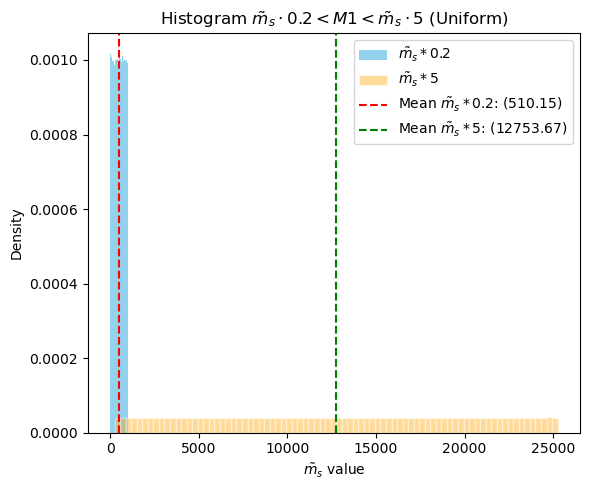

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform 
def dist_uniform(a,b,c):
    dist = uniform(a,b)
    samples = dist.rvs(size=c) 
    return samples
mu_SUSY, A_0 = dist_uniform(-15000,15000,1600000), dist_uniform(50,5000,1600000)
m_s, M1divms = dist_uniform(50,5000,1600000), dist_uniform(0.2,5,1600000)
beta = dist_uniform(np.arctan(1),np.arctan(60),1600000) 
M1 = np.array([m_s*0.2,m_s*5]) #nos aumenta el tamaño 
M1_l = m_s*0.2  #esto es para ver en donde se concentraría la distribución
M1_r = m_s*5
print(type(M1), type(m_s), M1.shape, m_s.shape) #son del mismo tipo
print(M1_l, mu_SUSY)
print(f'Media de m_s*0.2: {np.mean(M1_l)}')
print(f'\n {M1_r}')
print(f'Media de m_s*5: {np.mean(M1_r)}')
plt.figure(figsize=(6,5))
plt.hist(M1[0,:], bins=80, density=True, alpha= 0.9, label=r"$\tilde{m}_s*0.2$", color="skyblue")  #bins define el número de barras  M1[0,:]---> para tomar la primera dimensión ya que es (N,M) 
plt.hist(M1[1,:], bins=80, density=True, alpha= 0.4, label=r"$\tilde{m}_{s}*5$", edgecolor='white', color="orange")
plt.axvline(np.mean(M1_l), color='red', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*0.2$: ({np.mean(M1_l):.2f})")
plt.axvline(np.mean(M1_r), color='green', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*5$: ({np.mean(M1_r):.2f})")
plt.xlabel(r"$\tilde{m}_s$ value")     # eje X
plt.ylabel("Density") 
plt.title(r"Histogram $\tilde{m}_{s}\cdot0.2<M1<\tilde{m}_{s}\cdot5$ (Uniform)")
plt.legend()
plt.tight_layout()
plt.savefig('Hist_Uniform', dpi= 300, bbox_inches='tight')
plt.show()


##
## Weibull

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (2, 1600000) (1600000,)
[ 50.77555941  27.63586953  73.54149122 ... 227.73231658  59.45037273
 194.33257417] [-14881.65060086 -13775.18315322  -9323.97998275 ...  -8692.56511688
 -11790.57011872 -13673.15830792]
Media de m_s*0.2: 178.8497833237549

 [1269.38898515  690.89673813 1838.53728047 ... 5693.30791441 1486.25931836
 4858.31435418]
Media de m_s*5: 4471.24458309387


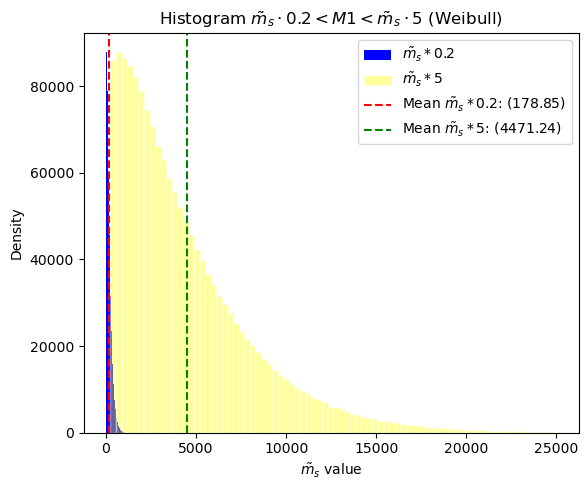

In [66]:
from scipy.stats import weibull_min
def weibull_trunc(k, a, b, n, p=0.999, loc=0.0): #n number of samples c is for the compact support so por a,b<0 you need c<0, thus c>a
    #Parameters de la Weibull (k,lam >0):
      # k-> shape  (= 1.14)
      #lam -> scale  (9)
      # truncated limits a, b
    if k <= 0:            raise ValueError("k must be > 0.")
    if not (a < b):       raise ValueError("it needs a < b.")
    if a < loc:           raise ValueError(f"'a' ({a}) < loc ({loc}). adjust 'loc' or range [a,b].")
    lam = (b - a) / (-np.log(1 - p))**(1.0 / k) #this ensures we'll have values for any range with lam scale
    # weibull original
    wb = weibull_min(k, scale=lam, loc=loc)
    
    #CDF on the limits
    Fa, Fb = wb.cdf(a), wb.cdf(b)         # for pdf: f_trunc(x) = f(x)/(F(b)-F(a))
    #Z = Fb - Fa                             # normalization
    
    if not (0.0 <= Fa < Fb <= 1.0):
        raise ValueError(f"Rango without mass: F(a)={Fa:.3g}, F(b)={Fb:.3g}. Check [a,b] y 'loc'.")

    #Generate samples
    U = np.random.rand(n)
    samples = wb.ppf(Fa + U*(Fb-Fa))         
    return samples
    
# Graphics
k = 1.14
mu_SUSY, A_0 = weibull_trunc(k,-15000,15000,1600000,loc=-20000), weibull_trunc(k,50,5000,1600000)
m_s, M1divms = weibull_trunc(k,50,5000,1600000), weibull_trunc(k,0.2,5,1600000)
beta = weibull_trunc(k,np.arctan(1),np.arctan(60),1600000) 
M1 = np.array([m_s*0.2,m_s*5]) #nos aumenta el tamaño 
M1_l = m_s*0.2  #esto es para ver en donde se concentraría la distribución
M1_r = m_s*5
print(type(M1), type(m_s), M1.shape, m_s.shape) #son del mismo tipo
print(M1_l, mu_SUSY)
print(f'Media de m_s*0.2: {np.mean(M1_l)}')
print(f'\n {M1_r}')
print(f'Media de m_s*5: {np.mean(M1_r)}')
plt.figure(figsize=(6,5))
plt.hist(M1[0,:], bins=80, density=False, alpha= 1, label=r"$\tilde{m}_s*0.2$", color="blue")  #bins define el número de barras  M1[0,:]---> para tomar la primera dimensión ya que es (N,M) 
plt.hist(M1[1,:], bins=80, density=False, alpha= 0.4, label=r"$\tilde{m}_{s}*5$", edgecolor='white', color="yellow")
plt.axvline(np.mean(M1_l), color='red', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*0.2$: ({np.mean(M1_l):.2f})")
plt.axvline(np.mean(M1_r), color='green', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*5$: ({np.mean(M1_r):.2f})")
plt.xlabel(r"$\tilde{m}_s$ value")     # eje X
plt.ylabel("Density") 
plt.title(r"Histogram $\tilde{m}_{s}\cdot0.2<M1<\tilde{m}_{s}\cdot5$ (Weibull)")
plt.legend()
plt.tight_layout()
plt.savefig('Hist_weibull', dpi= 300, bbox_inches='tight')
plt.show()

##
## Gamma

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (2, 1600000) (1600000,)
[276.94850256 311.53695467 216.94083144 ... 336.86220397 134.49088471
 824.30554604] [  3839.25975831  -5702.80899587 -10962.76786778 ...  -3695.39566419
  -2187.67792056 -12181.9177025 ]
Media de m_s*0.2: 299.4147334973117

 [ 6923.71256394  7788.42386675  5423.52078605 ...  8421.55509929
  3362.27211767 20607.63865107]
Media de m_s*5: 7485.368337432791


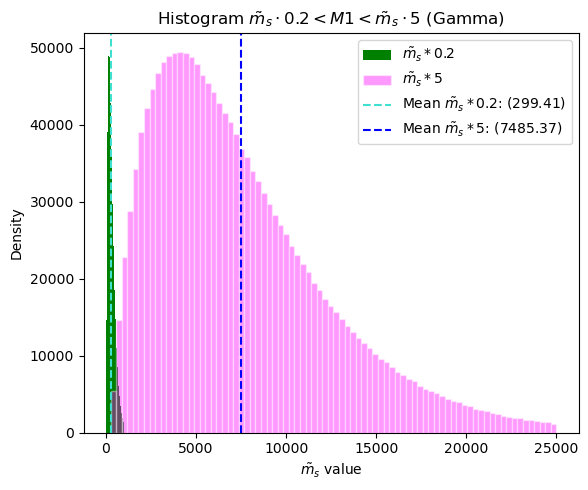

In [67]:
from scipy.stats import gamma
from scipy.special import gammaincinv
def gamma_trunc(k, lo, hi, n, p=0.99): #n number of samples 
    #Parameters de la Gamma:
      # k-> shape  (= 1.14)
      #alpha -> scale  
      # truncated limits a, b
    if k <= 0:
        raise ValueError("k must be > 0.")
    if not (lo < hi):
        raise ValueError("it needs a < b.")
    alpha = (hi-lo)/gammaincinv(k,p) #Scale for F(b) approx p so we can have negative values also
    # gamma original
    gam = gamma(a=k, scale=alpha, loc=lo)
    
    #CDF on the limits
    Fa, Fb = gam.cdf(lo), gam.cdf(hi)         # for pdf: f_trunc(x) = f(x)/(F(b)-F(a))
    #Z = Fb - Fa                             # normalization
    if Fa >= Fb:
        raise ValueError("The range [a,b] doesn't have mass probability")
    #Generate samples
    U = np.random.rand(n)
    samples = gam.ppf(Fa + U*(Fb-Fa))         
    return samples
    
# Graphics
k= 2
mu_SUSY, A_0 = gamma_trunc(k,-15000,15000,1600000), gamma_trunc(k,50,5000,1600000)
m_s, M1divms = gamma_trunc(k,50,5000,1600000), gamma_trunc(k,0.2,5,1600000)
beta = gamma_trunc(k,np.arctan(1),np.arctan(60),1600000) 
M1 = np.array([m_s*0.2,m_s*5]) #nos aumenta el tamaño 
M1_l = m_s*0.2  #esto es para ver en donde se concentraría la distribución
M1_r = m_s*5
print(type(M1), type(m_s), M1.shape, m_s.shape) #son del mismo tipo
print(M1_l, mu_SUSY)
print(f'Media de m_s*0.2: {np.mean(M1_l)}')
print(f'\n {M1_r}')
print(f'Media de m_s*5: {np.mean(M1_r)}')
plt.figure(figsize=(6,5))
plt.hist(M1[0,:], bins=80, density=False, alpha= 1, label=r"$\tilde{m}_s*0.2$", color="green")  #bins define el número de barras  M1[0,:]---> para tomar la primera dimensión ya que es (N,M) 
plt.hist(M1[1,:], bins=80, density=False, alpha= 0.4, label=r"$\tilde{m}_{s}*5$", edgecolor='white', color="magenta")
plt.axvline(np.mean(M1_l), color='turquoise', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*0.2$: ({np.mean(M1_l):.2f})")
plt.axvline(np.mean(M1_r), color='blue', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*5$: ({np.mean(M1_r):.2f})")
plt.xlabel(r"$\tilde{m}_s$ value")     # eje X
plt.ylabel("Density") 
plt.title(r"Histogram $\tilde{m}_{s}\cdot0.2<M1<\tilde{m}_{s}\cdot5$ (Gamma)")
plt.legend()
plt.tight_layout()
plt.savefig('Hist_gamma', dpi= 300, bbox_inches='tight')
plt.show()

##
## Gaussian

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (2, 1600000) (1600000,)
[546.45490562 420.38305807 463.20369641 ... 699.47949845 874.48064869
 552.54933502] [ -973.14103711 -5178.39829459  3163.63045978 ...  2715.20284036
 -5218.61761356 -4508.9455375 ]
Media de m_s*0.2: 504.9250375775565

 [13661.3726405  10509.57645177 11580.09241028 ... 17486.98746123
 21862.01621719 13813.73337558]
Media de m_s*5: 12623.125939438914


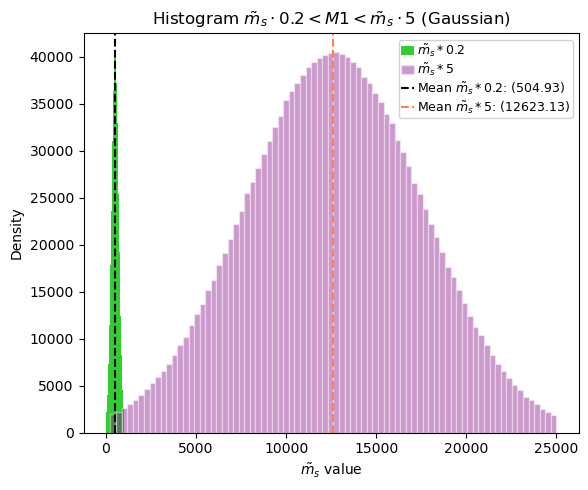

In [68]:
from scipy.stats import truncnorm
def trunc_norm_sample(a, b, samples): #a & b limits
    k=0.2 #standard deviation percent to choose from a given range
    mean, de= (a+b)/2 , k*(b-a)
    a_est, b_est =(a-mean)/de, (b-mean)/de  #fixed range as we want [a,b].
    data = truncnorm.rvs(a_est, b_est, loc=mean, scale=de, size=samples)
    return data

mu_SUSY, A_0 = trunc_norm_sample(-15000,15000,1600000), trunc_norm_sample(50,5000,1600000)
m_s, M1divms = trunc_norm_sample(50,5000,1600000), trunc_norm_sample(0.2,5,1600000)
beta = trunc_norm_sample(np.arctan(1),np.arctan(60),1600000) #cambiar la cantidad de valores implica que debes cambiar e igualar a la de mu1sqr1,etc


# Graphics
M1 = np.array([m_s*0.2,m_s*5]) #nos aumenta el tamaño 
M1_l = m_s*0.2  #esto es para ver en donde se concentraría la distribución
M1_r = m_s*5
print(type(M1), type(m_s), M1.shape, m_s.shape) #son del mismo tipo
print(M1_l, mu_SUSY)
print(f'Media de m_s*0.2: {np.mean(M1_l)}')
print(f'\n {M1_r}')
print(f'Media de m_s*5: {np.mean(M1_r)}')
plt.figure(figsize=(6,5))
plt.hist(M1[0,:], bins=80, density=False, alpha= 1, label=r"$\tilde{m}_s*0.2$", color="limegreen")  #bins define el número de barras  M1[0,:]---> para tomar la primera dimensión ya que es (N,M) 
plt.hist(M1[1,:], bins=80, density=False, alpha= 0.4, label=r"$\tilde{m}_{s}*5$", edgecolor='white', color="purple")
plt.axvline(np.mean(M1_l), color='black', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*0.2$: ({np.mean(M1_l):.2f})")
plt.axvline(np.mean(M1_r), color='coral', linestyle='--', label=rf"Mean $\tilde{{m}}_{{s}}*5$: ({np.mean(M1_r):.2f})")
plt.xlabel(r"$\tilde{m}_s$ value")     # eje X
plt.ylabel("Density") 
plt.title(r"Histogram $\tilde{m}_{s}\cdot0.2<M1<\tilde{m}_{s}\cdot5$ (Gaussian)")
plt.legend(
    fontsize=9,          # texto más chico
    framealpha=0.85,     # caja semitransparente
    borderpad=0.2,       # padding interno de la caja
    labelspacing=0.2,    # espacio entre renglones
    handlelength=1.0,    # largo de la línea/patch en la leyenda
    handletextpad=0.3,   # espacio entre handle y texto
    loc='upper right'    # o el que uses
)
plt.tight_layout()
plt.savefig('Hist_normal', dpi= 300, bbox_inches='tight')
plt.show()

<p style="text-align: justify; font-size:18px">
    For the entire code we won't write this functions anymore but use them from the file dist_trunc.py, which is in this same carpet   
    </p>

##
<p style="text-align: justify; font-size:18px">
    Now that we have built the distributions it's time to write the analytical model to generate the values and use these distributions, the final form of the muon $g-2$ anomaly contribution from the MSSM is given by:
    $$a_{\mu}=\frac{g_{c}^{2}m_{\mu}}{(4\pi)^{2}}\left[(S^{2}_{\tilde{B}\mu, \tilde{l}}+P^{2}_{\tilde{B}\mu, \tilde{l}})\frac{m_{\mu}}{6m^{2}_{\tilde{l}}}F_{1}^{N}(x)-(S^{2}_{\tilde{B}\mu, \tilde{l}}-P^{2}_{\tilde{B}\mu, \tilde{l}})\frac{m_{\tilde{B}}}{3m^{2}_{\tilde{l}}}F_{2}^{N}(x)\right],$$ 
    <br>
where $x=m_{\tilde{B}}^{2}/m^{2}_{\tilde{l}}$,  $g_{c}^{2}=\frac{tan^{2}\theta_{w}g_{1}^{2}}{16}.$
    <br>
    <br>
    See the article for the theoretical formulation and further details used in the code:
    <a href="https://doi.org/10.1140/epjc/s10052-016-4402-4" target="_blank">Read the article</a>
    </p>

##
<p style="text-align: justify; font-size:20px">  
 This is the analytical model with GAUSSIAN distribution 
    </p>
<p style="text-align: justify; font-size:18px"> 
  You can implement this with any of the distributions available in the file "dist_trunc.py" check it out in order to know the sintaxis works. And if you do it, pay attention to the code lines where the "m_mu1sqr1" and the other 3 functions next to it are defined because the distributions are used there also.
</p>

In [1]:
# We need to rewrite everything using functions so we can separate the data we'll use in the neural network. 
from scipy.stats import truncnorm 
import matplotlib.pyplot as plt   #libreries
import numpy as np
from time import perf_counter  #start counting compilation time  ------------------
# first part 
#Defining fixed parameters 
start = perf_counter() #start counting here ----------------------

theta = np.pi 
g_1 = 2 
g_c = ((np.tan(theta)**2)*g_1**2)/16
w, y = -1, 1 
m_tau = 1.777 #en GeV/c^2
## m_l will be defined below 
m_mu= 105.66 * 10**-3 #muon mass on GeV/c^2 
c= (4*np.pi)**2 #this factor is for the denominator of a_mu 
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--g_c**2--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Weinberg angle Sw=theta_w
alpha = 1/137.036
sw = np.sqrt(0.23116)
e = np.sqrt(4*np.pi*alpha) 
g_1 = e/np.sin(sw)
g_csqr = ((np.tan(sw)**2)*(g_1**2))/16 

#%%%%%%%%%%%%%%%%%%%--for defining v--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
m_z = 91.2 #GeV
v = (np.sin(2*sw)*m_z)/(2*np.sqrt(alpha*np.pi))
##########################--------------S_bmul y P_bmul----------#################################

########################----- let's define the values separately
#####################-----we need to know phi value
###################------we need this values also A_y, X_m y x_t
#################------ Similarly for A_y, we need the following parameters
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
####################### For this case we use UNIFORM distribution ######################################## 
import dist_trunc as dtr 
mu_SUSY, A_0 = dtr.trunc_norm_sample(-15000,15000,1600000), dtr.trunc_norm_sample(50,5000,1600000)
m_s, M1divms = dtr.trunc_norm_sample(50,5000,1600000), dtr.trunc_norm_sample(0.2,5,1600000)
beta = dtr.trunc_norm_sample(np.arctan(1),np.arctan(60),1600000) #change the number of n samples implies you must change to the same values of mu1sqr1,etc

#################################################################################################
def a_mutot(mu_SUSY,A_0,m_s,M1divms,beta):
    # A_y
    def A_y(A_0,beta):
        A_y = (1/np.sqrt(2))*y*A_0*v*np.cos(beta)
        return A_y
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--For X_m--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    def X_m(A_0,beta,mu_SUSY):
        X_m = (1/np.sqrt(2))*w*A_0*v*np.cos(beta) - mu_SUSY*m_mu*np.tan(beta)
        return X_m
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--For X_t--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #We still have X_t left to do 
    def X_t(A_0,beta,mu_SUSY):
        X_t = (1/np.sqrt(2))*A_0*v*np.cos(beta)-mu_SUSY*m_tau*np.tan(beta)
        return X_t
    
    phi= np.arctan(2*A_y(A_0,beta)/(X_m(A_0,beta,mu_SUSY)-X_t(A_0,beta,mu_SUSY)))
    #for mu_1, mu_2, tau_1, tau_2 en el S_bmul
    mu_1s = 3*np.cos(phi/2)
    mu_2s = np.cos(phi/2)
    tau_1s = -np.sin(phi/2)
    tau_2s = -3*np.sin(phi/2)

    S_bmul1=np.array([mu_1s])
    S_buml2=np.array([mu_2s])
    S_buml3=np.array([tau_1s])
    S_buml4=np.array([tau_2s])

    #for mu_1, mu_2, tau_1, tau_2 en el P_bmul
    mu_1p = np.cos(phi/2)
    mu_2p=3*np.cos(phi/2)
    tau_1p = -3*np.sin(phi/2)
    tau_2p = -np.sin(phi/2)


    P_bmul1=np.array([mu_1p])
    P_bmul2=np.array([mu_2p])
    P_bmul3=np.array([tau_1p])
    P_bmul4=np.array([tau_2p])
    #print(P_bmul1.shape)  ###-array (1,N)--###
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--Slpeton masses (m_l)--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #We choose a value because m_l= m_mui o m_taui ; i=1,,2 for instance mu_mu1**2, 
    # so with table 2 and defined values

    R=np.sqrt(4*(A_y(A_0,beta)**2)+(X_t(A_0,beta,mu_SUSY)-X_m(A_0,beta,mu_SUSY))**2)
    def m_mu1sqr1(m_s): #process used for the next 3 functions of m_l
        m_sadj1 = m_s.copy()
        negative_mask1 = m_sadj1**2 <= (-R-X_m(A_0,beta,mu_SUSY)-X_t(A_0,beta,mu_SUSY))/2
        k=0
        while negative_mask1.any(): #Use any for the True outcomes 'cause if you use .all() it means all must be True, with just one False
            m_srandtn1= dtr.trunc_norm_sample(50,5000,1600000)                           #loop won't execute
            # np.sum(n_mask) ensures you generate the same number of random values as the number of True entries in the boolean mask.
            # Or you can generate ms_randtn with the same shape and use ms_randtn[n_mask] if the other method is more computationally expensive.
            m_sadj1[negative_mask1] = m_srandtn1[negative_mask1] # Updates only negative values; i.e., takes the True entries from ms_adj that match with  
            negative_mask1 = m_sadj1**2 <= (-R-X_m(A_0,beta,mu_SUSY)-X_t(A_0,beta,mu_SUSY))/2 # They coincide with the positions of m_srandtn.                                                        #la posición de ms_randtn
            # Reevaluate the mask with the new values to confirm it’s resolved; if not, repeat the loop
        #     k = k + 1
        # if k > 0:
        #     print("\nNumber of times the loop ran to change the value:", k)
        # else:
        #     print("\nNo value change occurred, so the loop didn’t need to run")
        # print("\nUpdated m_s values:", m_sadj1)
        m_mu1sqr1noadj = (1/2)*(2*m_s**2 + X_m(A_0,beta,mu_SUSY) + X_t(A_0,beta,mu_SUSY) + R)
        #print("\nm_mu1sqr2 Values not fixed:", m_mu1sqr1noadj)  
        m_mu1sqr1 = (1/2)*(2*m_sadj1**2 + X_m(A_0,beta,mu_SUSY) + X_t(A_0,beta,mu_SUSY) + R)
        return m_mu1sqr1
    def m_mu1sqr2(m_s): # Here we resolve the issue with the negative values that are being returned. similarly for the others
        m_sadj = m_s.copy()
        negative_mask = m_sadj**2 <= (R-X_m(A_0,beta,mu_SUSY)-X_t(A_0,beta,mu_SUSY))/2
        # print(negative_mask)
        # print("Number of True entries where m_s <= the inequality:", sum(negative_mask))
        # print("Number of False entries (positive values where the m_s equality holds):", len(negative_mask) - sum(negative_mask))
        i=0
        while negative_mask.any(): 
            m_srandtn= dtr.trunc_norm_sample(50,5000,1600000)                           
            m_sadj[negative_mask] = m_srandtn[negative_mask]  
            negative_mask = m_sadj**2 <= (R-X_m(A_0,beta,mu_SUSY)-X_t(A_0,beta,mu_SUSY))/2                                                                 #la posición de ms_randtn
            # We re-evaluate the mask with the new values to confirm it’s resolved; if not, we repeat the loop
            i = i+1
        # if i > 0:
        #     print("\nNumber of times the loop ran to change the value:", i)
        # else:
        #     print("\nNo value change occurred, so running the loop wasn’t required")
        # print("\nUpdated m_s values:", m_sadj)
        m_mu1sqr2 = (1/2)*(2*m_sadj**2 + X_m(A_0,beta,mu_SUSY) + X_t(A_0,beta,mu_SUSY) - R)
        m_mu1sqr2noadj = (1/2)*(2*m_s**2 + X_m(A_0,beta,mu_SUSY) + X_t(A_0,beta,mu_SUSY) - R)
        #print("\nm_mu1sqr2 values not fixed:", m_mu1sqr2noadj)
        return m_mu1sqr2

    # For mu_tau1**2 y mu_tau2**2 ----------------------------------------------------------------
    def m_tau1sqr1(m_s):
        m_sadj3 = m_s.copy()
        negative_mask3 = m_sadj3**2 <= (X_m(A_0,beta,mu_SUSY)+X_t(A_0,beta,mu_SUSY)-R)/2
        #print(negative_mask)
        # print("---------------------------------------------------------------------------------------------------------------------")
        # print("Number of True entries where m_s <= the inequality for tau1sqr1:", sum(negative_mask3))
        # print("Number of False entries (positive values where the m_s equality holds) for tau1sqr2:", len(negative_mask3) - sum(negative_mask3))
        l=0
        while negative_mask3.any(): 
            m_srandtn3= dtr.trunc_norm_sample(50,5000,1600000)  #dimension must match
            m_sadj3[negative_mask3] = m_srandtn3[negative_mask3] 
            negative_mask3 = m_sadj3**2 <= (X_m(A_0,beta,mu_SUSY)+X_t(A_0,beta,mu_SUSY)-R)/2    
            l = l+1
        # if l > 0:
        #     print("\nNumber of times the loop ran to change the value:", l)
        # else:
        #     print("\nNo value change occurred, so running the loop wasn’t required")
        # # print("\nUpdated m_s values:", m_sadj)
        m_tau1sqr1nadj = (1/2)*(2*m_s**2 - X_m(A_0,beta,mu_SUSY) - X_t(A_0,beta,mu_SUSY) + R)
        #print("\nValores de m_tau1sqr2 sin ajuste:", m_tau1sqr1nadj)
        m_tau1sqr1 = (1/2)*(2*m_sadj3**2 - X_m(A_0,beta,mu_SUSY) - X_t(A_0,beta,mu_SUSY) + R)
        return m_tau1sqr1 
    def m_tau1sqr2(m_s): # Here we resolve the issue with the negative values that are being returned. 
        m_sadj2 = m_s.copy()
        negative_mask2 = m_sadj2**2 <= (R+X_m(A_0,beta,mu_SUSY)+X_t(A_0,beta,mu_SUSY))/2
        #print(negative_mask)
        # print("---------------------------------------------------------------------------------------------------------------------")
        # print("True de valores donde m_s es <= a la desigualdad para tau1sqr2:", sum(negative_mask2))
        # print("False de valores positivos donde se cumple la igualdad de m_s para tau1sqr2:", len(negative_mask2)-sum(negative_mask2))
        # print("Number of True entries where m_s <= the inequality for tau1sqr2:", sum(negative_mask2))
        # print("Number of False entries (positive values where the m_s equality holds) for tau1sqr2:",len(negative_mask2) - sum(negative_mask2))
        j=0
        while negative_mask2.any(): 
            m_srandtn2= dtr.trunc_norm_sample(50,5000,1600000) 
            m_sadj2[negative_mask2] = m_srandtn2[negative_mask2]  
            negative_mask2 = m_sadj2**2 <= (R+X_m(A_0,beta,mu_SUSY)+X_t(A_0,beta,mu_SUSY))/2                                                               #la posición de ms_randtn
            j = j+1
        # if j > 0:
        #     print("\nNumber of times the loop ran to change the value:", j)
        # else:
        #     print("\nNo value change occurred, so running the loop wasn’t required")
        # print("\nUpdated m_s values:", m_sadj)

        m_tau1sqr2nadj = (1/2)*(2*m_s**2 - X_m(A_0,beta,mu_SUSY) - X_t(A_0,beta,mu_SUSY) - R)
        #print("\nm_tau1sqr2 values not fixed:", m_tau1sqr2nadj)
        m_tau1sqr2 = (1/2)*(2*m_sadj2**2 - X_m(A_0,beta,mu_SUSY) - X_t(A_0,beta,mu_SUSY) - R)
        return m_tau1sqr2
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--bino mass (m_B=m_N1)--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # E_ms=np.mean(m_s)
    # M1 = trunc_norm_sample(E_ms*0.2,E_ms*5,1600)
    M1 = np.array([m_s*0.2,m_s*5]) #For simplicity we shall use this way of M1
    def m_B(mu_SUSY,beta):
        m_B = M1 - (((m_z**2)*(sw**2)*(M1+mu_SUSY*np.sin(2*beta)))/(mu_SUSY**2 - M1**2))
        #print(m_B.shape)
        return m_B
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--F_1^N & F_2^N--%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ##########___Define the x functions_____##################
    x1 = m_B(mu_SUSY,beta)**2/m_mu1sqr1(m_s) #for m_mu1 
    nmask = x1 <= 0
    print("x1 values that produce a negative result", sum(nmask))

    x2 = m_B(mu_SUSY,beta)**2/m_mu1sqr2(m_s) #for m_mu2
    nmask2 = x2 <= 0
    print("x2 values — with the adjusted m_s that still produce a negative result", sum(nmask2))
    x3 = m_B(mu_SUSY,beta)**2/m_tau1sqr1(m_s) #for m_tau1(correction not needed for negative values)
    nmask3 = x3 <= 0
    print("x3 values that produce negative result", sum(nmask3))

    x4 = m_B(mu_SUSY,beta)**2/m_tau1sqr2(m_s) #for m_tau2 
    nmask4 = x4 <= 0 
    print("x4 values with the adjsusted m_s that still produce a negative result",sum(nmask4))
    def F_1N(x):
        return (2/((1-x)**4))*(1 - 6*x + 3*x**2 + 2*x**3 - 6*x**2*np.log(x))
    def F_2N(x):
        return (3/((1-x)**3))*(1 - x**2 + 2*x*np.log(x))
    a_mu1= ((g_csqr*m_mu)/((4*np.pi)**2))*((S_bmul1**2 + P_bmul1**2)*(m_mu/(6*m_mu1sqr1(m_s)))*F_1N(x1) - (S_bmul1**2 - P_bmul1**2)*(m_B(mu_SUSY,beta)/(3*m_mu1sqr1(m_s)))*F_2N(x1))
    a_mu2= ((g_csqr*m_mu)/((4*np.pi)**2))*((S_buml2**2 + P_bmul2**2)*(m_mu/(6*m_mu1sqr2(m_s)))*F_1N(x2) - (S_buml2**2 - P_bmul2**2)*(m_B(mu_SUSY,beta)/(3*m_mu1sqr2(m_s)))*F_2N(x2))
    a_mu3= ((g_csqr*m_mu)/((4*np.pi)**2))*((S_buml3**2 + P_bmul3**2)*(m_mu/(6*m_tau1sqr1(m_s)))*F_1N(x3) - (S_buml3**2 - P_bmul3**2)*(m_B(mu_SUSY,beta)/(3*m_tau1sqr1(m_s)))*F_2N(x3))
    a_mu4= ((g_csqr*m_mu)/((4*np.pi)**2))*((S_buml4**2 + P_bmul4**2)*(m_mu/(6*m_tau1sqr2(m_s)))*F_1N(x4) - (S_buml4**2 - P_bmul4**2)*(m_B(mu_SUSY,beta)/(3*m_tau1sqr2(m_s)))*F_2N(x4))
    a_mutot = a_mu1 + a_mu2 + a_mu3 + a_mu4
    return a_mutot

result = a_mutot(mu_SUSY,A_0,m_s,M1divms,beta)
print("Total values of a_mu:\n", result)
print(result.shape)
# Here we apply the condition to keep values bounded to the range that yields a solution
# between 3.15 and 4.15 sigmas of a_muSUSY (i.e., within the [3.15, 4.15]σ band for a_muSUSY) because that's what we're looking for
a_muvalid = np.array([])
a_mususy = 200.445e-11 #allowed limit that can solve the anomaly
tol = 152.145e-11
a_muvalid = np.append(a_muvalid, result[(tol <= result) & (result <= a_mususy)])
# print("The values that satisfy the condition (i.e., yield a solution between 3.15 and 4.15 sigmas of a_muSUSY):\n", a_muvalid)
# First, a_mutot has shape (2, 100) while the masks are (N,) (1-D). Even if we flatten,
# mu_SUSY would be (100,) and a_mutot would become (200,), which don’t match.
# Therefore, we need to split a_mutot and compare row by row, so we end up with two (100,) arrays.

# Work with each row individually
result_row1 = result[0, :]
result_row2 = result[1, :]
# Make the masks for each row 
mask_row1 = (result_row1 >= tol) & (result_row1 <= a_mususy)
mask_row2 = (result_row2 >= tol) & (result_row2 <= a_mususy)

# Apply masks to mu_SUSY
filtered_mususy_row1 = mu_SUSY[mask_row1]
filtered_mususy_row2 = mu_SUSY[mask_row2]
#print(filtered_mususy_row1.shape, "filtered_mususy_row1")
# Concatenate the filtered results of both rows
combined_filtered_mususy = np.concatenate((filtered_mususy_row1, filtered_mususy_row2))

# Apply masks to the other arrays and concatenate
filtered_A0_row1 = A_0[mask_row1]
filtered_A0_row2 = A_0[mask_row2]
combined_filtered_A0 = np.concatenate((filtered_A0_row1, filtered_A0_row2))

filtered_ms_row1 = m_s[mask_row1]
filtered_ms_row2 = m_s[mask_row2]
combined_filtered_ms = np.concatenate((filtered_ms_row1, filtered_ms_row2))

filtered_m1divms_row1 = M1divms[mask_row1]
filtered_m1divms_row2 = M1divms[mask_row2]
combined_filtered_m1divms = np.concatenate((filtered_m1divms_row1, filtered_m1divms_row2))

filtered_beta_row1 = beta[mask_row1]
filtered_beta_row2 = beta[mask_row2]
combined_filtered_beta = np.concatenate((filtered_beta_row1, filtered_beta_row2))
# Print the combined filtered results to recover the full set of parameters,
# rather than a partition of them from a_mutot.
# print("\nFiltered values of mu_SUSY, A0, m_s, M1divms & beta that meet the condition:")
#print("Combined Filtered mu_SUSY:\n", combined_filtered_mususy)
#print("Combined Filtered A0:\n", combined_filtered_A0)
#print("Combined Filtered m_s:\n", combined_filtered_ms)
#print("Combined Filtered M1divms:\n", combined_filtered_m1divms)
#print("Combined Filtered beta:\n", combined_filtered_beta)
#Joining all parameters in one array but with subsets
filtered_parameters = list(zip(combined_filtered_mususy, combined_filtered_A0, combined_filtered_ms, combined_filtered_m1divms, combined_filtered_beta))
#print("\nfiltered values of mu_SUSY, A0, m_s, M1divms & beta that satisfy the condition but grouped into subsets of their union:" , "\n",filtered_parameters)
end = perf_counter()
print(f'Duración(s): {end-start}')

x1 values that produce a negative result [0 0 0 ... 0 0 0]
x2 values — with the adjusted m_s that still produce a negative result [0 0 0 ... 0 0 0]
x3 values that produce negative result [0 0 0 ... 0 0 0]
x4 values with the adjsusted m_s that still produce a negative result [0 0 0 ... 0 0 0]
Total values of a_mu:
 [[5.12994872e-11 1.69766030e-10 1.00527516e-10 ... 3.03296161e-11
  2.54328621e-10 3.04713729e-10]
 [6.90429080e-12 2.28836464e-11 1.35560653e-11 ... 4.06365665e-12
  3.40742815e-11 4.01899786e-11]]
(2, 1600000)
Duración(s): 80.75379220000468


In [2]:
#We create a file with the generated values: A0, beta, M1/ms, ms^{~}, mu_susy and a_muvalid related to them
#Print the a_mu generated from those parameters also 
long = len(combined_filtered_A0)
with open('Generated values of the 5 parameters', 'w')  as archivo: #'w' es para escribir solamente, si quieres read el archivo y escribir, es 'w+'
    archivo.write("|       A0         |---|        beta       |---|      m1divms     |---|          ms         |---|       mususy     |===>|       a_muvalid      |\n")  
    # la \t es un tabulador organizan el texto en columnas cuando se abre en un editor
    for i in range(long):
        archivo.write(f"{combined_filtered_A0[i]}\t"  #la f"" es una cadena formateada (f-string) permiten insertar expresiones o valores de variables directo dentro de la cadena
                      f"{combined_filtered_beta[i]}\t"
                      f"{combined_filtered_m1divms[i]}\t"
                      f"{combined_filtered_ms[i]}\t"
                      f"{combined_filtered_mususy[i]}\t"
                      f"{a_muvalid[i]}\n")
#aquí también creamos un archivo con los a_muvalid asociados a los parámetros del otro archivo individualmente

long_amu = len(a_muvalid) 
with open('a_mu values related to the 5 paremeters', 'w') as archivo2:
    for i in range(long_amu):
        archivo2.write(f"{a_muvalid[i]}\n")

filtered_params_arr = np.array(filtered_parameters)
print(filtered_params_arr.shape)
print(a_muvalid.shape)  #(lots of row, 5 colmuns or values)
#print(filtered_params_arr)
print(a_muvalid)
X = filtered_params_arr
y = a_muvalid  #this definitions are for the neural network 


(23521, 5)
(23521,)
[1.68254360e-09 1.85795386e-09 1.60924323e-09 ... 1.66420227e-09
 1.62818942e-09 1.71356882e-09]


>
<h1 style="color: rgb(128, 255, 120); font-size:24px; font-weight:bold">
    Here we start the preprocessing of the data and construction for the Neural Network
</h1>


In [32]:
#some libraries
#the filter parameters will be our input for the NN 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,  make_scorer
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau


### 1) We mix StandardScaler and MinMaxSCaler

In [33]:
# Verify original data
print("Original output data (y):")
print(y)
#let's split into training and test data (X are filtered_params & y our a_muvalid)
# We need to scale the y values (a_muvalid) because they are on the order of 1e-9, which makes training the NN harder.
# Scale the y values
# Scale X and y using different scalers
scaler_X = StandardScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten() # reshape converts a 1D array into a 2D array, and .flatten converts a 2D matrix back to a 1D array as it originally was.


# Check scaled y values
print("\nOutput scaled (y) values:")
print(y_scaled)

# Same check for X
print("\nOutput scaled (X) values:")
print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42) # random_state ensures the same data split every time the code runs; otherwise, you'd get a different split on each run.

Original output data (y):
[1.89854505e-09 1.72607353e-09 1.63102619e-09 ... 1.82040115e-09
 1.63759104e-09 1.85849218e-09]

Output scaled (y) values:
[0.78076648 0.42366501 0.22686995 ... 0.61896991 0.24046244 0.69783721]

Output scaled (X) values:
[[ 0.42863903 -0.0289144   0.16113273 -1.04848453  0.21295374]
 [ 0.2880856  -0.28298261  0.0529217   2.18120981  0.45550653]
 [ 0.32898716  0.8177239  -0.01595471  1.30643864  1.4040077 ]
 ...
 [ 0.114458   -0.06942822 -2.11115879 -0.33376067  1.43630962]
 [-1.82000498 -1.19477239 -2.02706336 -0.41027269  0.63042395]
 [ 0.4302537  -1.02146906 -2.07720362  0.49785969  0.41134748]]


### Create the Neural Network

In [34]:
start = perf_counter() 
model = Sequential([
    Input(shape=(5,)), #create the input layer explicity with 5 features 
    Dense(128, activation='relu', input_shape=(5,)), # 128 neurons, and input_dim=5 because there are 5 features per sample — (first layer, together with the above).
    # Dropout(0.5),  # dropout helps prevent overfitting.
    Dense(128, activation='relu'), 
    Dropout(0.2),  
    #Dropout(0.2),
    Dense(128, activation='relu'), # Second layer
    Dropout(0.2), # Turn off  50% or 20% of units in each iteration during training 
    # Dense(64, activation='relu'), # capa oculta con 64 neuronas #Aquí estamos probando con cuantas capas se ajusta mejor 
    # Dropout(0.5), # Apaga el 50% de las neuronas en cada iteración durante el entrenamiento
    Dense(1, activation='linear') # Output layer with one unit
])


# Compile model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error') # We tested learning rates of 0.1, 1e-1, 1e-2, 1e-3, 1e-4, and 1e-5, and the most suitable was --> 1e-3 <--
from tensorflow.keras.callbacks import EarlyStopping 

early_stop= EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Train el modelo
#model.fit(X_train, y_train, epochs=80, batch_size=10, validation_split=0.2)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])# We tested batch sizes of 8, 16, 32, and 64; 32 worked best.
# We also tried between 10 and 90 epochs with this configuration.
# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict with model
y_pred_scaled = model.predict(X_test)

# Inverse-transform (unscale) the predictions to return to the original ranges
y_pred = scaler_y.inverse_transform(y_pred_scaled)

#Unscale real values in order to compare both
y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()  
print("Unscaled predictions:")
print(y_pred)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test_descaled, y_pred)
mae = mean_absolute_error(y_test_descaled, y_pred)
r2 = r2_score(y_test_descaled, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

end= perf_counter()
print(f'Time(s): {end-start}')
# Imprimir las predicciones y los valores reales
print("\nPredictions vs Real values:")
for i in range(len(y_test_descaled)):
    print(f'Predicción: {y_pred[i][0]:.10f}, Valor Real: {y_test_descaled[i]:.10f}')
    

D:\Santi\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0938 - val_loss: 0.0287
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0278 - val_loss: 0.0230
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0240 - val_loss: 0.0203
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0215 - val_loss: 0.0201
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0210 - val_loss: 0.0190
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 7/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0184 - val_loss: 0.0205
Epoch 8/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 9/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0192 - val_loss: 0.0182
Epoch 10/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 11/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0171 - val_loss: 0.0177
Epoch 12/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

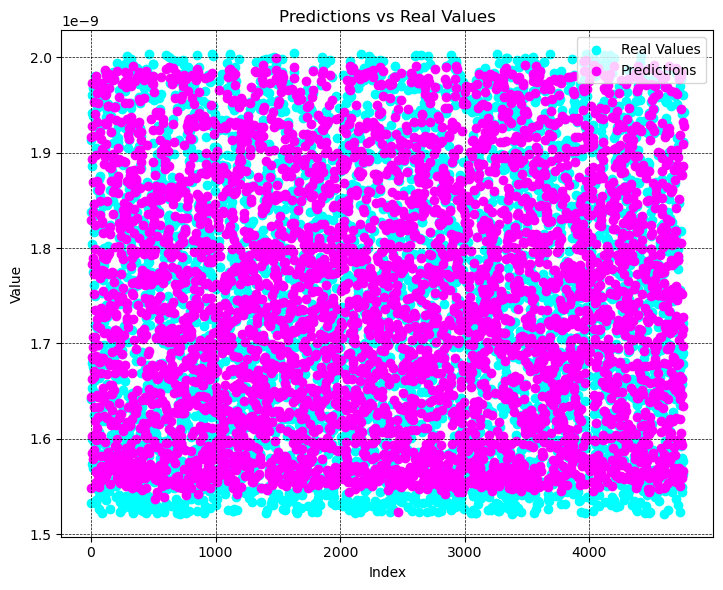

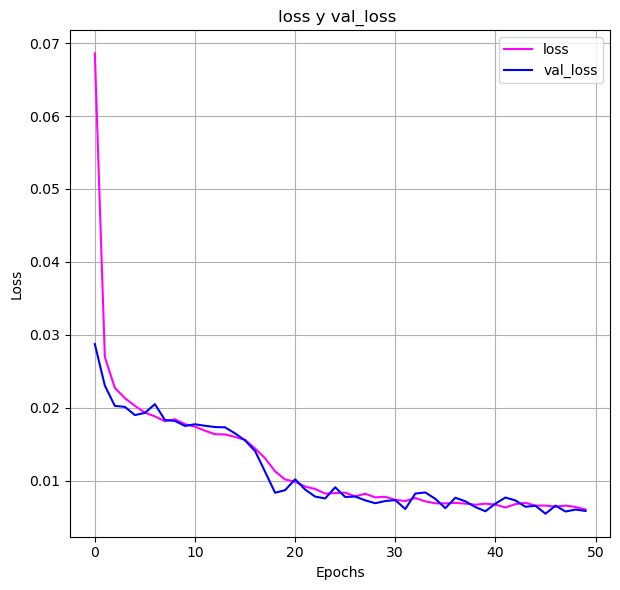

In [36]:
plt.figure(figsize=(14, 6))

# Grahpics 
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_descaled)), y_test_descaled, label='Real Values', marker='o', color='cyan')
plt.scatter(range(len(y_test_descaled)), np.array(y_pred).flatten(), label='Predictions', marker='o', color='magenta')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Real Values')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=0.5) #cuadrícula

# show graphics
plt.tight_layout()
plt.savefig('Pred_vs_val_1NN', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(18, 6))

# loss training and validation through epochs
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='loss', color='magenta')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss y val_loss ')
plt.legend()
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.savefig('loss_val_loss_1NN', dpi=300, bbox_inches='tight')
plt.show()

##
<p style="text-align: justify; font-wight:bold; font-size:18px"> 
  If you want to check running with diferent learning rates, compile the following code
</p>

In [ ]:
# FOR DIFFERENT LEARNING RATES 
learning_rates=[1e-1,1e-2,1e-3,1e-4,1e-5]
histories=[]
val_losses_final=[]

for lr in learning_rates: 
    model = Sequential([
        Input(shape=(5,)), 
        Dense(128, activation='relu', input_shape=(5,)), 
        Dense(128, activation='relu'), 
        Dropout(0.2),  
        Dense(128, activation='relu'), 
        Dropout(0.2), 
        Dense(1, activation='linear') 
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error') 
    early_stop= EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop]) 
    loss = model.evaluate(X_test, y_test)
    print(f'Model Loss: {loss}')

    y_pred_scaled = model.predict(X_test)

    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten() 


    mse = mean_squared_error(y_test_descaled, y_pred)
    mae = mean_absolute_error(y_test_descaled, y_pred)
    r2 = r2_score(y_test_descaled, y_pred)
    #Save result for each LR
    histories.append(history)
    val_losses_final.append(min(history.history['val_loss']))

plt.figure(figsize=(8,5))
for lr, history in zip(learning_rates, histories):
    if lr==1e-3:
        plt.plot(history.history['val_loss'], label=f'val_loss (lr={lr})', linewidth=1.5, linestyle='dashdot', color='magenta', marker='+')
    else: 
        plt.plot(history.history['val_loss'], label=f'val_loss (lr={lr})',linewidth=1.5, linestyle='dashdot')
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Progression of loss validation for Learning Rate')
plt.legend()
plt.grid(True)
plt.savefig('perdida_por_LR', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(learning_rates, val_losses_final, marker='o', linestyle='-', color='magenta')
plt.xscale('log')
plt.xlabel("Learning Rate (log)")
plt.ylabel("Best Validation Loss")
plt.title("Comparison of Validation Loss based on Learning Rate")
plt.grid(True)
plt.savefig('val_loss con LR', dpi=300, bbox_inches='tight')
plt.show()

##
<p style=' text-decoration: underline; font-size:20px; font-wight:bold;'>
    For checking with 4 activation functions including our main function:  ReLu, ELU, Swish, Softplus
    compile this
</p>

In [ ]:
# Different activation functions NN
from tensorflow.keras.callbacks import EarlyStopping
activations=['relu', 'elu', 'swish', 'softplus'] #For each activation
histories={} #we use dictionaries to relate each activation func with our results directly

def diff_act_model(activation='relu'):
    model = Sequential([
        Input(shape=(5,)), 
        Dense(128, activation=activation, input_shape=(5,)), 
        Dense(128, activation=activation), 
        Dropout(0.2), 
        Dense(128, activation=activation), 
        Dropout(0.2), 
        Dense(1, activation='linear') 
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error') #hemos probado learning rate de 0.1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5 y el más adecuado fue --> 1e-3 <--
    return model

for act in activations:
    print(f'training with activation: {act}')
    model= diff_act_model(activation=act)
    early_stop= EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop]) 
    loss = model.evaluate(X_test, y_test)
    histories[act]=history
    print(f'Model Loss: {loss}')
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten() 

#some graphics    
plt.figure(figsize=(10,6))
for act, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=act)
    
plt.title("Comparison of activation functions (validation loss)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    
import seaborn as sns
import pandas as pd
# Gather all val_loss by activation
data = []
for act, hist in histories.items():
    for epoch, val in enumerate(hist.history['val_loss']):
        data.append({'activation': act, 'epoch': epoch, 'val_loss': val})

df = pd.DataFrame(data)
df['activation']= df['activation'].map({
    'relu': 'ReLu',
    'elu': 'ELU',
    'swish': 'Swish',
    'softplus': 'SoftPlus'

})

# Gráfico tipo stripplot (estilo tesis)
plt.figure(figsize=(4, 6))
sns.stripplot(x='activation', y='val_loss', data=df, jitter=True, palette='Set2', hue='activation', s=7, edgecolor='black',linewidth=0.5,alpha=1, legend=False)
plt.title("Distribution of Validation Loss by Epoch and Activation")
plt.ylabel("Validation Loss")
plt.xlabel('')
plt.xticks(rotation=35)
plt.grid(True)
plt.tight_layout()
plt.savefig('val_act_funcs', dpi=300, bbox_inches='tight')
plt.show()



##
<p style="color:magenta; font-size:20px; font-weihgt:bold;"> 
    Now we get the parameters  
</p>  

Weights of the layer: 1 [[-5.45968488e-02  2.42606122e-02 -5.22270836e-02 -1.38457939e-01
  -7.36634154e-03 -1.15263239e-02 -1.41809195e-01  1.65399760e-02
   5.64432964e-02  1.18304156e-01 -1.13437856e-02  8.71878490e-03
  -1.27699859e-02  4.22695577e-02  1.27813965e-01 -5.74459955e-02
   2.72954181e-02  6.24658465e-02  6.25142083e-02 -4.83404584e-02
  -1.59773156e-02  1.71163045e-02 -4.80556302e-02 -1.84749737e-02
   6.52387785e-03  1.58610506e-04 -1.47419065e-01  2.96642017e-02
   2.03682482e-03 -1.51338309e-01 -9.32704955e-02  4.16421518e-02
  -2.74571385e-02  2.97422577e-02  1.09909251e-02  5.42828031e-02
   3.74664809e-03  1.37306880e-02 -4.87824380e-02  2.62518302e-02
   4.58196998e-02  2.12571584e-02  1.55480178e-02 -2.64891703e-02
  -1.58532411e-02 -2.72076130e-02  2.05497853e-02 -1.26283029e-02
  -1.75083116e-01  3.62188742e-02 -3.50842327e-02  8.47133473e-02
   4.21319492e-02  5.67222089e-02  9.00072511e-03 -3.05587589e-03
  -9.71051380e-02  3.59964781e-02  5.60655110e-02  6

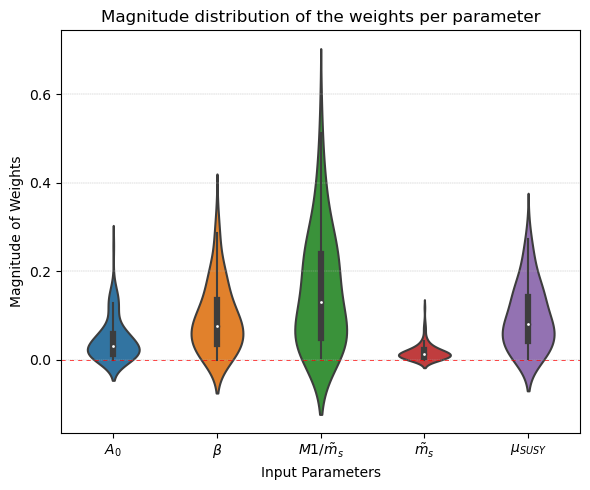

In [38]:
# weights and bias from the first layer
k=0
pesos_capa1, sesgos_capa1 = model.layers[k].get_weights()
print(f"Weights of the layer: {k+1}", pesos_capa1)
print(pesos_capa1.shape) # Since our layer was (n, 5), the weight matrix should be (5, n) with a bias vector of shape (n,).
# Compute the mean of the absolute weights per input feature to assess each feature's influence (there are 5 features).
# This corresponds to the 5 parameters and follows the specified order.
promedio_pesos = np.mean(np.abs(pesos_capa1), axis=1)
# Print the averages for parameter 
for i, promedio in enumerate(promedio_pesos):
    print(f"Parámetro {i+1}: Promedio de magnitud de pesos = {promedio}")
    
#Nos let's see it's distribution
import seaborn as sns
import pandas as pd
# We reorganize with DataFrames 
pesos_df = pd.DataFrame(pesos_capa1.T, columns=[r"$A_0$", r"$\beta$",r"$M1/\tilde{m}_{s}$", r"$\tilde{m}_{s}$",r"$\mu_{SUSY}$"]) #.T transpone from (5,128) to (128,5)
plt.figure(figsize=(6, 5))
sns.violinplot(data=np.abs(pesos_df), width=0.5, scale='width', bw=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=0.5, dashes=(6,6))
plt.xlabel('Input Parameters')
plt.ylabel('Magnitude of Weights')
plt.title('Magnitude distribution of the weights per parameter')
plt.grid(True, axis='y', linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.savefig('Dist_pesos_1NN', dpi=300, bbox_inches='tight')
plt.show()

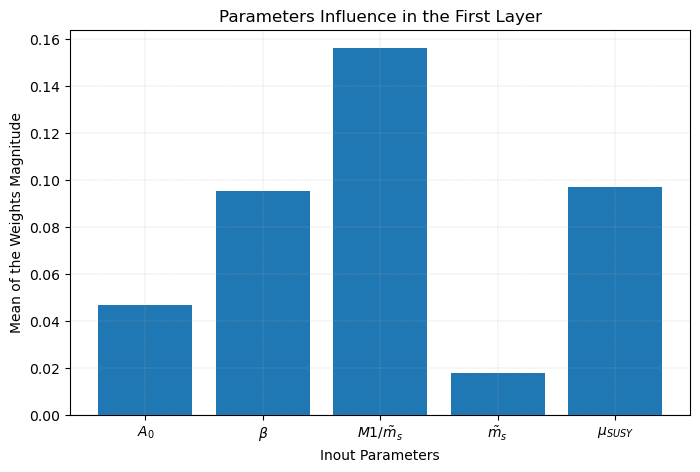

In [39]:
promedio_pesos = np.mean(np.abs(pesos_capa1), axis=1)

plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), promedio_pesos)
plt.xlabel('Inout Parameters')
plt.ylabel('Mean of the Weights Magnitude')
plt.title('Parameters Influence in the First Layer')
plt.xticks(range(1, 6), labels=[r"$A_0$", r"$\beta$",r"$M1/\tilde{m}_{s}$", r"$\tilde{m}_{s}$",r"$\mu_{SUSY}$"])
plt.grid(True, linewidth=0.2, linestyle='--')
plt.show()

In [40]:
# we can see our model summary here  
for i, layer in enumerate(model.layers):
    print(f"Index: {i}, Name: {layer.name}, Output Shape: {layer.output.shape}")
    
model.summary()

Index: 0, Name: dense, Output Shape: (None, 128)
Index: 1, Name: dense_1, Output Shape: (None, 128)
Index: 2, Name: dropout, Output Shape: (None, 128)
Index: 3, Name: dense_2, Output Shape: (None, 128)
Index: 4, Name: dropout_1, Output Shape: (None, 128)
Index: 5, Name: dense_3, Output Shape: (None, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,765 (397.52 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,844 (265.02 KB)

## ________________________________________________________________________________________________________________________________
### Next step is extracting features from some layers to start a new model and freeze the extracted layers, this means different domain source but same task 
<h1 style="text-align: center; color:cyan; font-size:25px; font-weight:bold;">
    Transfer learning with tensorflow
</h1>

In [41]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Concatenate, Dense 

index = [3,5] 
L_2layers = [model.layers[i] for i in index]

for i, layer in zip(index, L_2layers):
    print(f"Capa de indíce: {i}, {layer}")


Capa de indíce: 3, <Dense name=dense_2, built=True>
Capa de indíce: 5, <Dense name=dense_3, built=True>


In [42]:
new_input_dim = model.input_shape[1] # Our new network will have the same input dimensions as in the first NN.

input_tensor = Input(shape=(new_input_dim,)) # Here I define a tensor that adds the input dimension from the first NN we built, so you can feed X_train correctly.
x = Dense(128, activation="relu")(input_tensor) # input_tensor connects the newly created Dense layer (`x`) to the first layer (input_layer),
# so the computation graph now has two layers.  
x = Dense(128, activation="relu")(x) # Here I create another layer connected to the computation graph; next we add the previously trained layers.
x = L_2layers[0](x)    # Now I'm connecting the fourth layer—the second-to-last—from our first NN to the two existing layers.
output_tensor = L_2layers[1](x) # Finally, the *last* layer from our first NN, extracted and added to this new model.
# ---- The network is defined sequentially, so we can add layers simply by chaining `x`,
#      since it connects them in sequence to what the graph already has in place. ----

new_model = Model(inputs=input_tensor, outputs=output_tensor) # Now `inputs` captures the start of the computation graph (where the network begins),
# and `outputs` specifies where it ends.
print(new_input_dim)
new_model.summary() 

5


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
for layer in new_model.layers[-2:]: # [-n] indexes from the end (right to left).
# With this, we freeze the last two layers—the ones we keep to leverage what our first NN learned.
    layer.trainable=False  #If you want them to be trainable again, just change False to True (and vice versa).
#layer=new_model.layers[4]
#layer.trainable=False  # This code modifies only a single layer, not multiple layers as in the for loop.
for layer in new_model.layers:
    print(f"Capa: {layer.name}, Entrenable: {layer.trainable}")

Capa: input_layer_1, Entrenable: True
Capa: dense_4, Entrenable: True
Capa: dense_5, Entrenable: True
Capa: dense_2, Entrenable: False
Capa: dense_3, Entrenable: False


#
<p style="text-align: center; font-size:20px; font-weight:bold;">
    Rerun the parameter extraction code; these will serve as new data for training the second network.
    Also scale them—use the same process. Fortunately we made another file to rerun the analytical model for the parameter extraction, 
    which is in this same folder as "a_mu_susy.py". Recall that the a_mu_susy is written with gaussian truncated from "dist_trunc.py". 
    If you want to use another distribution you must edit the a_mu_susy file
</p>

In [46]:
import importlib, a_mu_susy 
a_mu_susy = importlib.reload(a_mu_susy) #this is for obtain new values on each call you do 
X = a_mu_susy.X
y= a_mu_susy.y
print(f'Filtered parameters shape and values:{X.shape}, {X}')
print(f'$a_muvalid$ related to this parameters shape and values:{y.shape}, {y}')

Duración(s): 34.23817040002905
Filtered parameters shape and values:(23265, 5), [[-1.54596626e+03  3.93998130e+03  1.36166374e+03  1.36835636e+00
   9.56672305e-01]
 [-5.58180892e+03  3.12744363e+03  1.20414036e+03  1.58994334e+00
   1.06326663e+00]
 [ 1.02257372e+03  2.74740563e+03  1.28057248e+03  1.85365745e+00
   9.44267687e-01]
 ...
 [ 1.88562730e+03  2.39561612e+03  4.35946818e+02  3.41185335e+00
   1.36753215e+00]
 [ 9.85974174e+02  2.12823429e+03  5.67322864e+02  2.31836818e+00
   1.00772331e+00]
 [ 3.56528477e+03  2.20225737e+03  4.52685552e+02  2.58402058e+00
   1.32305977e+00]]
$a_muvalid$ related to this parameters shape and values:(23265,), [1.96648549e-09 1.88647726e-09 1.61119834e-09 ... 1.56710150e-09
 1.89088246e-09 1.54484467e-09]


Scaling again

In [47]:
print("Original output data (y):")
print(y)
scaler_X = StandardScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten() 
# Check scaled y values
print("\nOutput scaled (y) values:")
print(y_scaled)
# Same check for X
print("\nOutput scaled (X) values:")
print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42) # random_state ensures the same data split every time the code runs; otherwise, you'd get a different split on each run.

Original output data (y):
[1.96648549e-09 1.88647726e-09 1.61119834e-09 ... 1.56710150e-09
 1.89088246e-09 1.54484467e-09]

Output scaled (y) values:
[0.92142491 0.75576789 0.18580293 ... 0.09450043 0.76488885 0.04841766]

Output scaled (X) values:
[[-0.209819    1.29448704  1.29292606 -1.34978674 -1.24294731]
 [-0.91897515  0.37852859  0.69545787 -1.10712259 -0.48503151]
 [ 0.24151077 -0.04988112  0.9853562  -0.81832422 -1.33114765]
 ...
 [ 0.39316181 -0.44644684 -2.2182125   0.88808594  1.67838229]
 [ 0.2350797  -0.74786135 -1.71991816 -0.30941061 -0.87996025]
 [ 0.68830202 -0.66441652 -2.15472439 -0.01848958  1.3621711 ]]


In [48]:
# Since these layers capture the distribution and optimization—not the generated data itself, but its abstraction—
# we need to generate data for the new network.

# Compile model
start = perf_counter() #counting time
new_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')
# Train model 
early_stop= EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = new_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred_scaled = new_model.predict(X_test) 

# Unscaling 
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()  #Para MinMaxScaler y StandardScaler mixto
print("Unscaled predictions:")
print(y_pred)

# Evaluation metrics
mse2 = mean_squared_error(y_test_descaled, y_pred)
mae2 = mean_absolute_error(y_test_descaled, y_pred)
r2_2 = r2_score(y_test_descaled, y_pred)

print(f'Mean Squared Error (MSE): {mse2}')
print(f'Mean Absolute Error (MAE): {mae2}')
print(f'R² Score: {r2_2}')

end=perf_counter() 
print(f'Time(s): {end-start}')

# Print predictions and real values
print("\nPredicciones vs Valores Reales:")
for i in range(len(y_test_descaled)):
    print(f'Predicción: {y_pred[i][0]:.10f}, Valor Real: {y_test_descaled[i]:.10f}')

Epoch 1/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0680 - val_loss: 0.0256
Epoch 2/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0219 - val_loss: 0.0236
Epoch 3/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0204 - val_loss: 0.0204
Epoch 4/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0176 - val_loss: 0.0199
Epoch 5/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - val_loss: 0.0188
Epoch 6/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0161 - val_loss: 0.0197
Epoch 7/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0165 - val_loss: 0.0179
Epoch 8/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0157 - val_loss: 0.0177
Epoch 9/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0152 - val_loss: 0.0173
Epoch 10/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149 - val_loss: 0.0168
Epoch 11/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0147 - val_loss: 0.0156
Epoch 12/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Some graphics of the 2nd NN

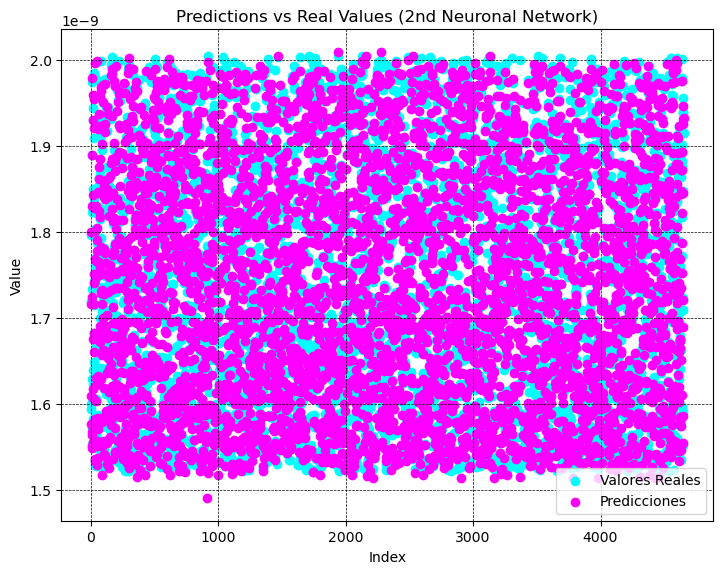

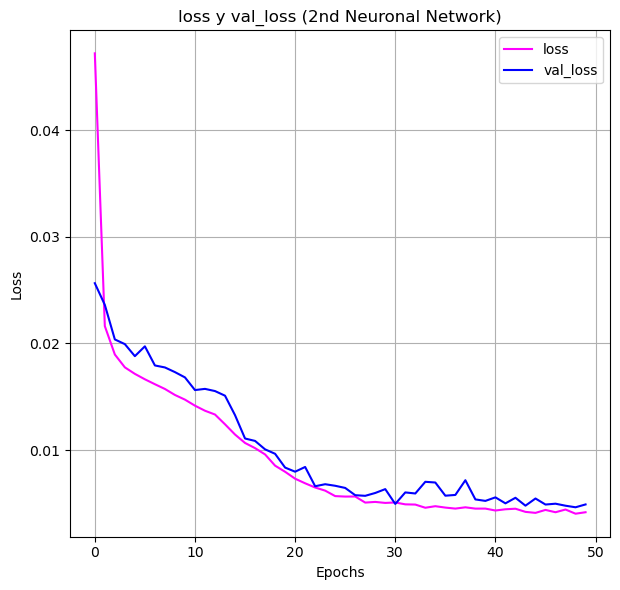

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,483 (267.52 KB)

 Trainable params: 17,280 (67.50 KB)

 Non-trainable params: 16,641 (65.00 KB)

 Optimizer params: 34,562 (135.01 KB)

5
0 input_layer_1
1 dense_4
2 dense_5
3 dense_2
4 dense_3


In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_descaled)), y_test_descaled, label='Valores Reales', marker='o', color='cyan')
plt.scatter(range(len(y_test_descaled)), np.array(y_pred).flatten(), label='Predicciones', marker='o', color='magenta')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Real Values (2nd Neuronal Network)')
plt.grid(True, color='black', linestyle='--', linewidth='0.5') #cuadrícula
plt.legend()

# show lgraphics
plt.tight_layout()
plt.savefig('Pred_vs_val_2NN', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(18, 6))
# Loss training and validation 
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='loss', color='magenta')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss y val_loss (2nd Neuronal Network)')
plt.legend()
plt.grid(True)

# show
plt.tight_layout()
plt.savefig('loss_val_loss_2NN', dpi=300, bbox_inches='tight')
plt.show()

#and model summary
new_model.summary()
print(len(new_model.layers))  #number of layers
for i, layer in enumerate(new_model.layers):   
    print(i, layer.name)   #print layers with name

Now for Weights graphics

In [51]:
pesos_capa1r2, sesgos1r2 = new_model.layers[1].get_weights() #si pones [0] saldrá error ya que en el summary los params son 0 
print(len(pesos_capa1r2))   
print(pesos_capa1r2.shape)  
print(pesos_capa1r2) 

5
(5, 128)
[[ 1.99412301e-01 -6.85009360e-02  2.02893885e-03 -3.89202498e-02
  -6.99840263e-02  1.30590469e-01 -2.16761287e-02 -2.64390349e-01
   6.42883927e-02 -2.68981814e-01 -1.78693265e-01 -1.45388683e-02
   1.57935560e-01  7.01774731e-02  2.70334096e-03 -1.18429154e-01
   1.87352777e-01 -2.14650840e-01 -6.07988564e-03 -3.72173995e-01
   1.48310661e-01  1.80325732e-01  1.61739197e-02 -1.33457128e-02
  -5.66080511e-02  9.35139954e-02 -1.69259071e-01 -1.40835449e-01
  -9.64957289e-03  7.66253248e-02  1.08303100e-01  1.99674815e-02
  -3.79890472e-01  1.01158768e-01 -1.29851624e-01 -1.35144874e-01
  -1.63646545e-02 -3.03955283e-02  3.43446657e-02 -8.35177600e-02
   6.14190102e-02 -3.37400101e-02 -1.32641971e-01  3.34312324e-03
   1.99067798e-02  4.33270261e-02  5.01999073e-02  1.90300196e-01
   5.18750958e-02 -2.86550634e-02  1.49596417e-02 -5.06630123e-01
  -2.92644858e-01  2.98723336e-02  5.79203889e-02 -1.61140710e-02
  -3.43956240e-03 -8.75092596e-02 -1.69381425e-01  6.54316470e-02

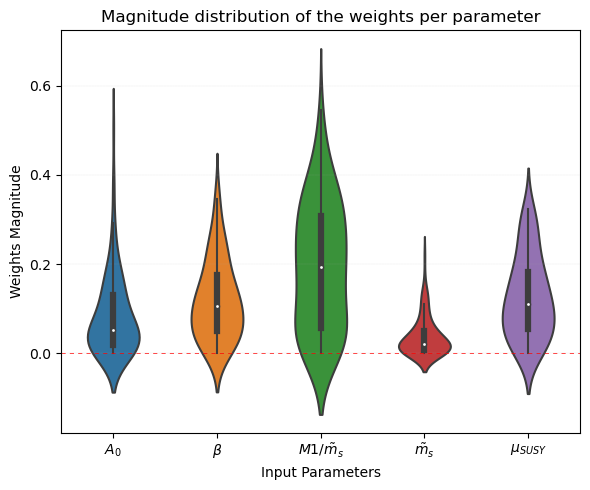

In [52]:
pesos_df2 = pd.DataFrame(pesos_capa1r2.T, columns=[r"$A_0$", r"$\beta$",r"$M1/\tilde{m}_{s}$", r"$\tilde{m}_{s}$",r"$\mu_{SUSY}$"]) 

plt.figure(figsize=(6, 5))  
sns.violinplot(data=np.abs(pesos_df2), width=0.5, scale='width', bw=0.5)   
plt.axhline(0, color='red', linestyle='--', linewidth=0.5, dashes=(6,6))
plt.xlabel('Input Parameters')  
plt.ylabel('Weights Magnitude')  
plt.title('Magnitude distribution of the weights per parameter')  
plt.grid(True, axis='y', linestyle='--', linewidth=0.1)
plt.tight_layout()
plt.savefig('Dist_pesos_2NN', dpi=300, bbox_inches='tight')
plt.show()  

##
<p style="color: rgb(210,170,30); font-size:24px; font-weight:bold;">
    Now we'll feed in new data to see how predictive the model is after training is complete.
</p>

In [53]:
import importlib, a_mu_susy 
a_mu_susy = importlib.reload(a_mu_susy) #this is for obtain new values on each call you do 
X = a_mu_susy.X
y= a_mu_susy.y
print(f'Filtered parameters shape and values:{X.shape}, {X}')
print(f'$a_muvalid$ related to this parameters shape and values:{y.shape}, {y}')

Duración(s): 36.51555999997072
Filtered parameters shape and values:(23309, 5), [[ 1.17284063e+04  3.93355529e+03  1.40608450e+03  3.03917284e+00
   1.02578221e+00]
 [ 5.05380826e+03  1.80458556e+03  1.06888470e+03  2.44227867e+00
   1.03570072e+00]
 [ 5.48063265e+03  2.21863931e+03  9.58052772e+02  1.27830040e+00
   1.23689291e+00]
 ...
 [ 6.94981591e+03  2.30895510e+03  5.99297676e+02  3.84571590e+00
   1.05352998e+00]
 [ 8.65148296e+03  2.30101107e+03  4.90398616e+02  2.77070886e+00
   1.08361806e+00]
 [-1.06871464e+04  2.80182674e+03  6.39357684e+02  2.60934253e+00
   1.00694119e+00]]
$a_muvalid$ related to this parameters shape and values:(23309,), [1.52390625e-09 1.52514164e-09 1.60679151e-09 ... 1.53283640e-09
 1.88767554e-09 1.79645632e-09]


In [54]:
#Scaling one more time
X = filtered_params_arr
y_real = a_muvalid
print(y.shape)
X_new_scaled = scaler_X.transform(X)
y_real_scaled = scaler_y.transform(y.reshape(-1,1)).flatten()

# Verificar los valores de y escalados
print("\nValores de salida (y) escalados:")
print(y_real_scaled)

# Verificar la división de datos
print("\nValores de salida (X) escalados:")
print(X_new_scaled)


(23309,)

Valores de salida (y) escalados:
[0.00506466 0.00762255 0.17667858 ... 0.02355453 0.75824893 0.56937954]

Valores de salida (X) escalados:
[[ 2.2350015   0.17191147  0.52661602  1.0307983  -0.14566788]
 [ 1.08282318 -0.0265667   0.62264753 -0.70630647 -0.86646645]
 [-0.64107704 -0.56419418  0.48437985 -1.56976095 -0.59256327]
 ...
 [-1.28740129  0.38679804 -1.8128352  -1.51402947  1.17576422]
 [ 1.3924751  -1.21367817 -1.75416502  2.51340068 -1.21760699]
 [-1.91489562  0.48484025 -1.80256944 -0.54135011  1.2047586 ]]


In [55]:
start= perf_counter() #Time
# Predict with model
y_pred_scaled = model.predict(X_new_scaled)

# Unscaling predictions 
y_pred = scaler_y.inverse_transform(y_pred_scaled) 

print("Unscaled predictions:")
print(y_pred)

# Metrics
mse = mean_squared_error(y_real, y_pred)
mae = mean_absolute_error(y_real, y_pred)
r2 = r2_score(y_real, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

end=perf_counter()  
print(f'Time(s): {end-start}')

# Print predictions and real values
print("\nPredicciones vs Valores Reales:")
for i in range(len(y_real)):
    print(f'Predicción: {y_pred[i][0]:.10f}, Valor Real: {y_real[i]:.10f}')

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Unscaled predictions:
[[1.6849342e-09]
 [1.8409287e-09]
 [1.6082363e-09]
 ...
 [1.6191548e-09]
 [1.5807400e-09]
 [1.6524252e-09]]
Mean Squared Error (MSE): 1.486314325904954e-21
Mean Absolute Error (MAE): 2.2653839896814935e-11
R² Score: 0.9227713814477871
Time(s): 1.4032829999923706

Predicciones vs Valores Reales:
Predicción: 0.0000000017, Valor Real: 0.0000000017
Predicción: 0.0000000018, Valor Real: 0.0000000019
Predicción: 0.0000000016, Valor Real: 0.0000000016
Predicción: 0.0000000018, Valor Real: 0.0000000019
Predicción: 0.0000000016, Valor Real: 0.0000000016
Predicción: 0.0000000019, Valor Real: 0.0000000019
Predicción: 0.0000000020, Valor Real: 0.0000000020
Predicción: 0.0000000018, Valor Real: 0.0000000018
Predicción: 0.0000000016, Valor Real: 0.0000000016
Predicción: 0.0000000019, Valor Real: 0.0000000020
Predicción: 0.0000000018, Valor Real: 0.0000000018
Predicción: 0.0000000018, Valor Real: 0.0000000018
Predicción: 0.0000000019, Val

Graphics

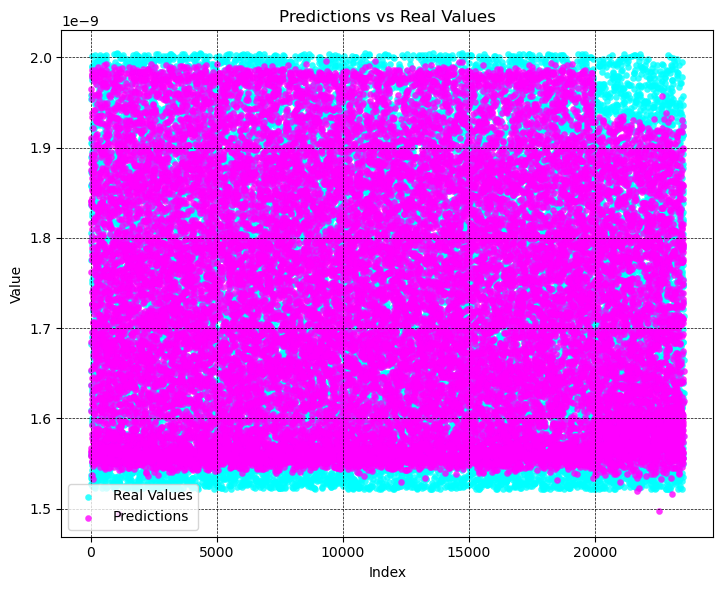

In [56]:
plt.figure(figsize=(14, 6))

# Gráfico de Predicciones vs. Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_real)), y_real, label='Real Values', marker='o', color='cyan', linewidth=0.2, s= 20, alpha=0.8)
plt.scatter(range(len(y_real)), np.array(y_pred).flatten(), label='Predictions', marker='o', color='magenta', linewidth=0.2, s= 20, alpha=0.8)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Real Values')
plt.grid(True, color='black', linestyle='--', linewidth='0.5') #cuadrícula
plt.legend()


# Mostrar las gráficas
plt.tight_layout()
plt.savefig('Pred_vs_newval', dpi=300, bbox_inches='tight')
plt.show()



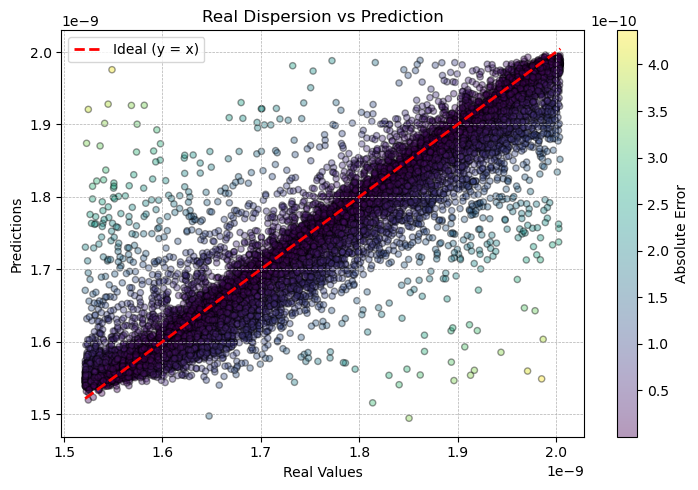

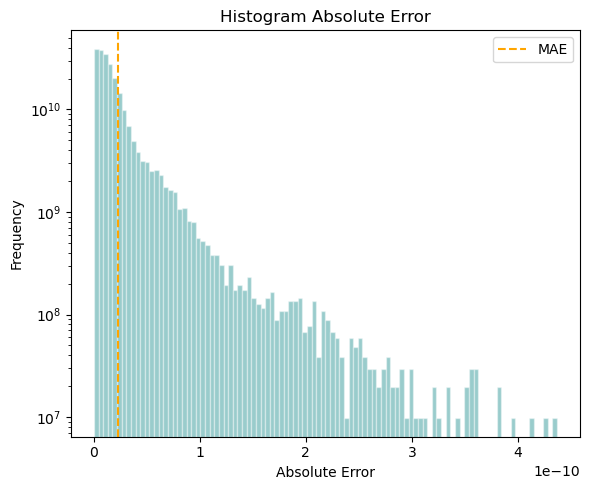

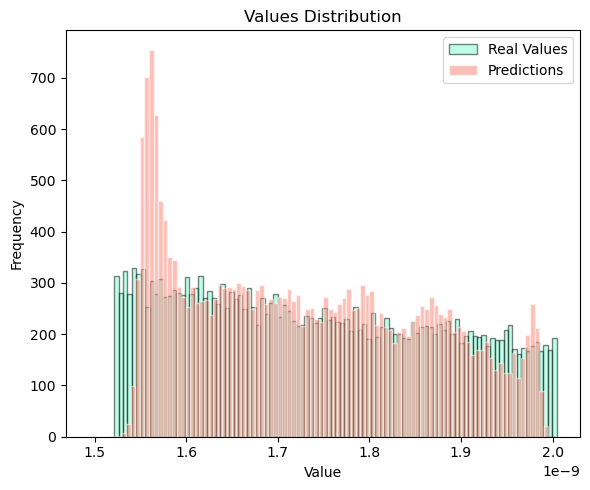

In [57]:
# Subplot 2: dispersion real vs predict
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
errors = np.abs(y_pred.flatten() - y_real) # flatten ensures everything has shape (n,) instead of (n, 1)—a flat 1D vector rather than a column vector.
sc =  plt.scatter(
    y_real, y_pred,
    c=errors,
    cmap='viridis',
    alpha=0.4,
    edgecolors='k',
    s=20
)

plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], 'r--', linewidth=2, label='Ideal (y = x)')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Dispersion vs Prediction')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()

# Barra de color para interpretar el error
cbar = plt.colorbar(sc)
cbar.set_label('Absolute Error')

plt.tight_layout()
plt.savefig('Pred_vs_newDisp', dpi=300, bbox_inches='tight')
plt.show()

#Absolute error of final model 
errors = np.abs(y_pred.flatten() - y_real)
plt.figure(figsize=(6,5))
plt.hist(errors, bins=100, alpha=0.4, edgecolor='white', color='teal', density=True)

plt.title('Histogram Absolute Error')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(np.mean(errors), color='orange', linestyle='--', label='MAE')
plt.legend()
#plt.grid(True)


plt.tight_layout()
plt.savefig('Finalmodel_AE', dpi= 300, bbox_inches='tight')
plt.show()

#Other distribution graph of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist(y_real, bins=100, alpha=0.5, edgecolor='black', label="Real Values", color='aquamarine')
plt.hist(y_pred, bins=100, alpha=0.5, edgecolor='white', label="Predictions", color='salmon')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title("Values Distribution")
plt.tight_layout()
plt.savefig('Dist_valores', dpi=300, bbox_inches='tight')
plt.show()